### This notebook is an exploration of FAO Indicator Data. The objective of this notebook is to explore the data pertaining to Hunger, Food Loss, Forest Area, and Water Use of the world.

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

The data from imported can be downloaded from http://www.fao.org/sustainable-development-goals/indicators/en/ 

In [3]:
all_data = pd.read_excel(r'SDG_BulkDownload_Aug_2020.xlsx')

In [4]:
all_data.head()

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,...,SeriesCode,UpperBound,LowerBound,Age,CL_SEX,CL_OBS_STATUS,RefAreaType_InternalUseOnly,Disaggregation,OBS_STATUS,CumulativeValue
0,2.1.1,3025,Number of undernourish people (millions),1,World,2000,808.6,2000,"FAO, Statistics Division",NaN,...,SN_ITK_DEFCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.1.1,3025,Number of undernourish people (millions),1,World,2001,827.2,2001,"FAO, Statistics Division",NaN,...,SN_ITK_DEFCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.1.1,3025,Number of undernourish people (millions),1,World,2002,863.8,2002,"FAO, Statistics Division",NaN,...,SN_ITK_DEFCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.1.1,3025,Number of undernourish people (millions),1,World,2003,847.1,2003,"FAO, Statistics Division",NaN,...,SN_ITK_DEFCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.1.1,3025,Number of undernourish people (millions),1,World,2004,851,2004,"FAO, Statistics Division",NaN,...,SN_ITK_DEFCN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
total_data = all_data.drop(columns=['UpperBound', 'LowerBound', 'Age', 'CL_SEX', 'CL_OBS_STATUS', 'RefAreaType_InternalUseOnly', 'Disaggregation', 'OBS_STATUS', 'CumulativeValue'])

In [6]:
total_data.head()

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,ReportingType,SeriesCode
0,2.1.1,3025,Number of undernourish people (millions),1,World,2000,808.6,2000,"FAO, Statistics Division",NaN,E,NUM_M,NaN,SN_ITK_DEFCN
1,2.1.1,3025,Number of undernourish people (millions),1,World,2001,827.2,2001,"FAO, Statistics Division",NaN,E,NUM_M,NaN,SN_ITK_DEFCN
2,2.1.1,3025,Number of undernourish people (millions),1,World,2002,863.8,2002,"FAO, Statistics Division",NaN,E,NUM_M,NaN,SN_ITK_DEFCN
3,2.1.1,3025,Number of undernourish people (millions),1,World,2003,847.1,2003,"FAO, Statistics Division",NaN,E,NUM_M,NaN,SN_ITK_DEFCN
4,2.1.1,3025,Number of undernourish people (millions),1,World,2004,851,2004,"FAO, Statistics Division",NaN,E,NUM_M,NaN,SN_ITK_DEFCN


In [7]:
total_data.describe()

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,ReportingType,SeriesCode
count,85767,45553,85765,85735,85201,85765,48781,74395,71784,44766,52686,85166,54036,84619
unique,27,307,35,298,292,34,24679,66,102,1502,6,13,3,33
top,2.1.2,2831,"Indicator of Food Price Anomalies (IFPA), by t...",112,Belarus,2015,0,2016,Food and Agriculture Organisation of the Unite...,NA = A figure was not provided.,E,PERCENT,G,AG_FPA_COMM
freq,15072,7536,7515,344,344,10309,6835,4185,13944,8843,26403,36271,53959,7515


In [8]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85767 entries, 0 to 85766
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Indicator          85767 non-null  object
 1   SeriesID           45553 non-null  object
 2   SeriesDescription  85765 non-null  object
 3   GeoAreaCode        85735 non-null  object
 4   GeoAreaName        85201 non-null  object
 5   TimePeriod         85765 non-null  object
 6   Value              48781 non-null  object
 7   Time_Detail        74395 non-null  object
 8   Source             71784 non-null  object
 9   FootNote           44766 non-null  object
 10  Nature             52686 non-null  object
 11  Units              85166 non-null  object
 12  ReportingType      54036 non-null  object
 13  SeriesCode         84619 non-null  object
dtypes: object(14)
memory usage: 9.2+ MB


The indicators in this dataset represent different catergories under FAO custodianship. Now we will subset the relevant data to take a look at Hunger(2.1.1 & 2.1.2), Food Loss(12.3.1), Forest Area(15.1.1) and Water Use(6.4.1 & 6.4.2). We will look at the world as a whole, then by different areas.

## Hunger Indicators(2.1.1 & 2.1.2)

## World

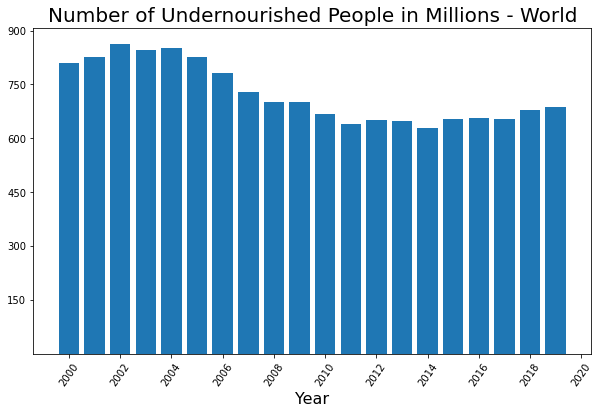

In [9]:
whunger = total_data[(total_data['GeoAreaName'] == 'World')]
whunger_num = whunger[(whunger['Units'] == 'NUM_M')]

plt.figure(figsize=(10, 6))
plt.bar('TimePeriod', 'Value', data = whunger_num)
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation = 55)
plt.yticks([150,300,450,600,750,900])
plt.xlabel('Year', fontsize=16)
plt.title('Number of Undernourished People in Millions - World', fontsize=20);

In [29]:
whunger.Units.unique()

array(['NUM_M', 'PERCENT', 'NUM_TH', 'NUMBER', 'IX', nan, 'USD/m3',
       'Score [Level of implementation: 1 lowest - 5 highest]',
       'Score [level of implementation: 1 lowest to 5 highest]',
       'T_PER_HA', 'HA_TH'], dtype=object)

In [31]:
whunger_per = whunger[(whunger['Units'] == 'PERCENT')]
whunger_per.head()

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,ReportingType,SeriesCode
5386,2.1.1,1857,Prevalence of undernourishment (%),1,World,2000,13.2,2000,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5387,2.1.1,1857,Prevalence of undernourishment (%),1,World,2001,13.3,2001,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5388,2.1.1,1857,Prevalence of undernourishment (%),1,World,2002,13.7,2002,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5389,2.1.1,1857,Prevalence of undernourishment (%),1,World,2003,13.3,2003,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5390,2.1.1,1857,Prevalence of undernourishment (%),1,World,2004,13.2,2004,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC


In [32]:
whunger_per.shape

(179, 14)

In [33]:
whunger_per

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,ReportingType,SeriesCode
5386,2.1.1,1857,Prevalence of undernourishment (%),1,World,2000,13.2,2000,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5387,2.1.1,1857,Prevalence of undernourishment (%),1,World,2001,13.3,2001,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5388,2.1.1,1857,Prevalence of undernourishment (%),1,World,2002,13.7,2002,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5389,2.1.1,1857,Prevalence of undernourishment (%),1,World,2003,13.3,2003,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
5390,2.1.1,1857,Prevalence of undernourishment (%),1,World,2004,13.2,2004,"FAO, Statistics Division",NaN,E,PERCENT,NaN,SN_ITK_DEFC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79389,15.2.1,1869,Proportion of forest area with a long-term man...,1,World,2016,56.76,2016,"FAO, Global Forest Resources Assessment",Aggregate. Only countries with data for all ye...,NaN,PERCENT,G,AG_LND_FRSTMGT
79390,15.2.1,1869,Proportion of forest area with a long-term man...,1,World,2017,57,2017,"FAO, Global Forest Resources Assessment",Aggregate. Only countries with data for all ye...,NaN,PERCENT,G,AG_LND_FRSTMGT
79391,15.2.1,1869,Proportion of forest area with a long-term man...,1,World,2018,57.56,2018,"FAO, Global Forest Resources Assessment",Aggregate. Only countries with data for all ye...,NaN,PERCENT,G,AG_LND_FRSTMGT
79392,15.2.1,1869,Proportion of forest area with a long-term man...,1,World,2019,57.9,2019,"FAO, Global Forest Resources Assessment",Aggregate. Only countries with data for all ye...,NaN,PERCENT,G,AG_LND_FRSTMGT


In [34]:
whunger_per = whunger_per[(whunger_per['Indicator'] == '2.1.1')]

In [37]:
whunger_per.shape

(20, 14)

In [46]:
whunger_per = whunger_per.drop(columns=['GeoAreaCode', 'SeriesDescription', 'SeriesID', 'Time_Detail', 'Source', 'FootNote', 'Nature', 'Units', 'ReportingType', 'SeriesCode'])

KeyError: "['GeoAreaCode' 'SeriesDescription' 'SeriesID' 'Time_Detail' 'Source'\n 'FootNote' 'Nature' 'Units' 'ReportingType' 'SeriesCode'] not found in axis"

In [49]:
whunger_per = whunger_per.drop(columns=['GeoAreaName'])

In [52]:
whunger_per.reset_index()

,index,TimePeriod,Value
0,5386,2000,13.2
1,5387,2001,13.3
2,5388,2002,13.7
3,5389,2003,13.3
4,5390,2004,13.2
5,5391,2005,12.6
6,5392,2006,11.8
7,5393,2007,10.9
8,5394,2008,10.3
9,5395,2009,10.2


In [53]:
whunger_per.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 5386 to 5405
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TimePeriod  20 non-null     object
 1   Value       20 non-null     object
dtypes: object(2)
memory usage: 480.0+ bytes


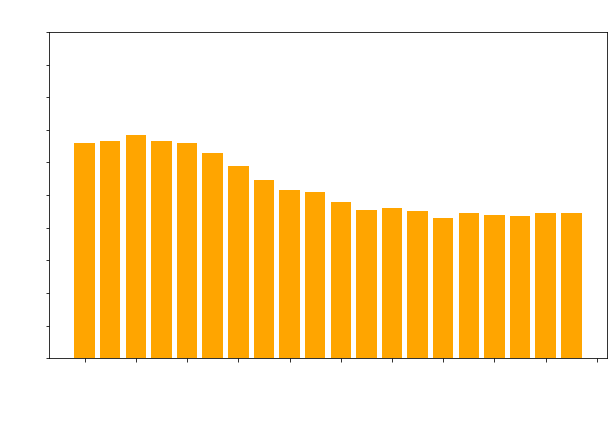

In [224]:
##plotting percentage of undernourished in the world for powerpoint 

plt.figure(figsize=(10, 6))
plt.bar('TimePeriod', 'Value', data = whunger_per, color='orange')
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation = 55, color='white')
plt.yticks([0,2,4,6,8,10,12,14,16,18,20], color='white')
plt.xlabel('Year', color='white', fontsize=18)
plt.ylabel('Percentage', color='white', fontsize=18)
plt.title('Undernourished People in the World', color='white', fontsize=24)
plt.savefig('World Undernourished Percentage.png', dpi=72,bbox_inches='tight', transparent=False);

##should replace colors here after importing to presentation.

In [54]:
## Saving this table to use in PowerPoint chart.
whunger_per.to_excel("World Hunger Percentage.xlsx")

Now let's look at the continents

## Africa

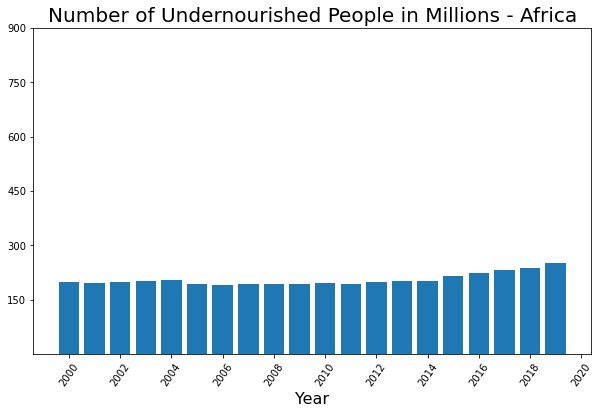

In [10]:
afhunger = total_data[(total_data['GeoAreaName'] == 'Africa (M49)')]
afhunger_num = afhunger[(afhunger['Units'] == 'NUM_M')]

plt.figure(figsize=(10, 6))
plt.bar('TimePeriod', 'Value', data = afhunger_num)
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation = 55)
plt.yticks([150,300,450,600,750,900])
plt.xlabel('Year', fontsize=16)
plt.title('Number of Undernourished People in Millions - Africa', fontsize=20);

## South America

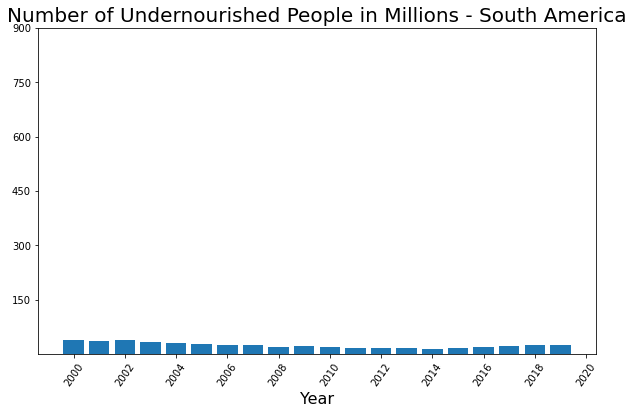

In [11]:
sahunger = total_data[(total_data['GeoAreaName'] == 'South America (M49)')]
sahunger_num = sahunger[(sahunger['Units'] == 'NUM_M')]

plt.figure(figsize=(10, 6))
plt.bar('TimePeriod', 'Value', data = sahunger_num)
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation = 55)
plt.yticks([150,300,450,600,750,900])
plt.xlabel('Year', fontsize=16)
plt.title('Number of Undernourished People in Millions - South America', fontsize=20);

## Asia

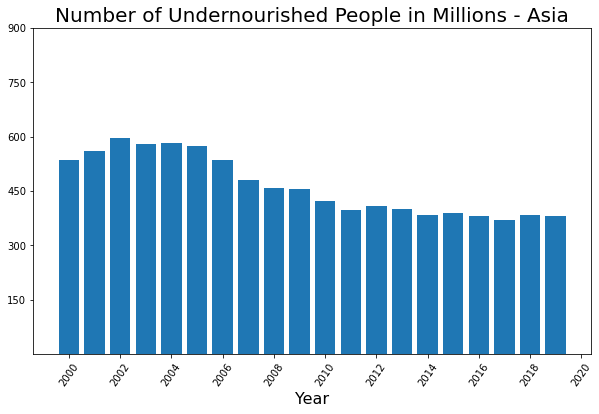

In [12]:
ashunger = total_data[(total_data['GeoAreaName'] == 'Asia (M49)')]
ashunger_num = ashunger[(ashunger['Units'] == 'NUM_M')]

plt.figure(figsize=(10, 6))
plt.bar('TimePeriod', 'Value', data = ashunger_num)
plt.xticks([2000,2002,2004,2006,2008,2010,2012,2014,2016,2018,2020], rotation = 55)
plt.yticks([150,300,450,600,750,900])
plt.xlabel('Year', fontsize=16)
plt.title('Number of Undernourished People in Millions - Asia', fontsize=20);

The only continents that have plotable data are Africa, Asia, and South America. The other continents have under 2.5% of the population that experience undernourshment. The Value column for North America, Europe, and Australia contains 'NA' and are not plotable.

## Let's look at food insecurity(2.1.2) for the world.

In [117]:
food_insecure = all_data[(all_data['Indicator'] == '2.1.2')]

In [131]:
wfood_insecure = food_insecure.drop(columns=['GeoAreaCode', 'Time_Detail', 'Source', 'FootNote', 'Age',  'Nature', 'CL_OBS_STATUS', 'Disaggregation', 'OBS_STATUS', 'CumulativeValue', 'RefAreaType_InternalUseOnly', 'ReportingType', 'SeriesCode'])

In [132]:
wfood_insecure_per = wfood_insecure[(wfood_insecure['Units'] == 'PERCENT')]

In [133]:
worldfood_insecure_per = wfood_insecure_per[(wfood_insecure_per['GeoAreaName'] == 'World')]

In [134]:
worldfood_insecure_perT = worldfood_insecure_per[(worldfood_insecure_per['CL_SEX'] == '_T')]

In [135]:
worldfood_insecure_perT

,Indicator,SeriesID,SeriesDescription,GeoAreaName,TimePeriod,Value,Units,UpperBound,LowerBound,CL_SEX
10772,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2014,22.3918,PERCENT,23.050647,21.732917,_T
10773,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2015,22.3513,PERCENT,22.941267,21.761256,_T
10774,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2016,23.248,PERCENT,23.855656,22.640282,_T
10775,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2017,24.8343,PERCENT,25.387308,24.281363,_T
10776,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2018,25.8104,PERCENT,26.410821,25.209918,_T
10777,2.1.2,2831,Prevalence of moderate or severe food insecuri...,World,2019,25.9435,PERCENT,26.452494,25.434490,_T
14540,2.1.2,2831,Prevalence of severe food insecurity (%),World,2014,8.25135,PERCENT,8.256398,8.246304,_T
14541,2.1.2,2831,Prevalence of severe food insecurity (%),World,2015,7.94025,PERCENT,7.944365,7.936132,_T
14542,2.1.2,2831,Prevalence of severe food insecurity (%),World,2016,8.11205,PERCENT,8.115808,8.108297,_T
14543,2.1.2,2831,Prevalence of severe food insecurity (%),World,2017,8.56441,PERCENT,8.567529,8.561286,_T


In [137]:
worldfood_insecure_perTmod = worldfood_insecure_perT[(worldfood_insecure_perT['SeriesDescription'] == 'Prevalence of moderate or severe food insecurity (%)')]
worldfood_insecure_perTsev = worldfood_insecure_perT[(worldfood_insecure_perT['SeriesDescription'] == 'Prevalence of severe food insecurity (%)')]

In [142]:
worldfood_insecure_perTmod['moderate_std'] = worldfood_insecure_perTmod['UpperBound'] - worldfood_insecure_perTmod['LowerBound']
worldfood_insecure_perTsev['severe_std'] = worldfood_insecure_perTsev['UpperBound'] - worldfood_insecure_perTsev['LowerBound']

<ipython-input-142-69499fd5e5ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldfood_insecure_perTmod['moderate_std'] = worldfood_insecure_perTmod['UpperBound'] - worldfood_insecure_perTmod['LowerBound']
<ipython-input-142-69499fd5e5ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worldfood_insecure_perTsev['severe_std'] = worldfood_insecure_perTsev['UpperBound'] - worldfood_insecure_perTsev['LowerBound']


In [145]:
moderate_std.astype(int)

10772    1
10773    1
10774    1
10775    1
10776    1
10777    1
dtype: int32

In [175]:
severe_std

14540    0.010094
14541    0.008233
14542    0.007511
14543    0.006243
14544    0.007142
14545    0.006430
dtype: float64

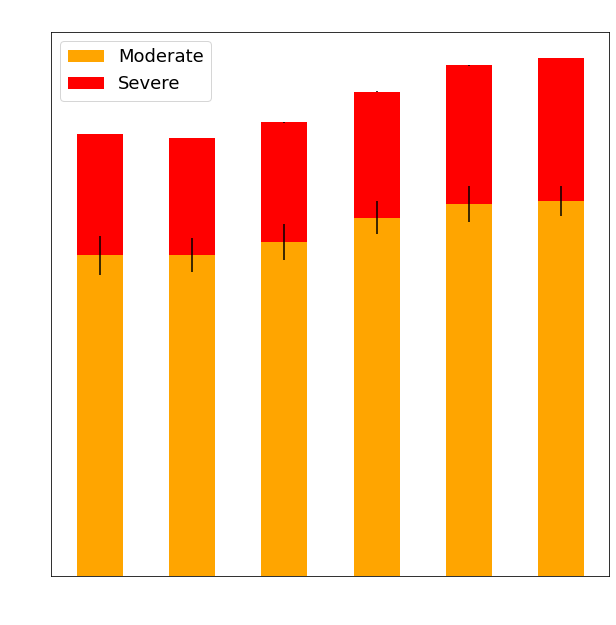

In [177]:
fig, ax = plt.subplots(figsize=(10, 10))
width = 0.5
labels = worldfood_insecure_perTmod['TimePeriod']
moderate = worldfood_insecure_perTmod['LowerBound']
severe = worldfood_insecure_perTsev['LowerBound']


ax.bar(labels, moderate, width, yerr=moderate_std, label='Moderate', color='orange')
ax.bar(labels, severe, width, yerr=severe_std, bottom=moderate,
       label='Severe', color='red')

ax.set_ylabel('Percentage', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.yaxis.label.set_color('white') 
ax.xaxis.label.set_color('white') 
ax.tick_params(axis='both', labelsize='large', labelcolor='w', colors='w')
ax.set_title('Food Insecurity', fontsize=24, color='w')
ax.legend(fontsize=18)
fig.savefig('World Food Insecurity.png', dpi=72,bbox_inches='tight', transparent=False)
plt.show()


## Food Loss 12.3.1

In [180]:
food_loss = total_data[(total_data['Indicator'] == '12.3.1')]

In [181]:
food_loss_reg = food_loss[(food_loss['Source'] == 'FAO')]

In [206]:
food_loss_reg

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,Nature,Units,ReportingType,SeriesCode
66110,12.3.1,NaN,Food loss percentage,513,Northern America (M49) and Europe (M49),2016,15.7,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66111,12.3.1,NaN,Food loss percentage,202,Sub-Saharan Africa (M49),2016,14,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66114,12.3.1,NaN,Food loss percentage,419,Latin America and the Caribbean (MDG=M49),2016,11.6,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66115,12.3.1,NaN,Food loss percentage,62,Central Asia (M49) and Southern Asia (MDG=M49),2016,20.7,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66118,12.3.1,NaN,Food loss percentage,753,Eastern Asia (M49) and South-eastern Asia (MDG...,2016,7.8,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66121,12.3.1,NaN,Food loss percentage,747,Western Asia (M49) and Northern Africa (M49),2016,10.8,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66125,12.3.1,NaN,Food loss percentage,543,Oceania (M49) excluding Australia and New Zeal...,2016,8.9,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66126,12.3.1,NaN,Food loss percentage,53,Australia and New Zealand (M49),2016,5.8,2016,FAO,NaN,M,PERCENT,R,AG_FLS_IDX
66158,12.3.1,NaN,Food loss percentage,1,World,2016,13.8,2016,FAO,NaN,M,PERCENT,G,AG_FLS_IDX


In [212]:
food_loss_reg_sorted = food_loss_reg.sort_values('Value')

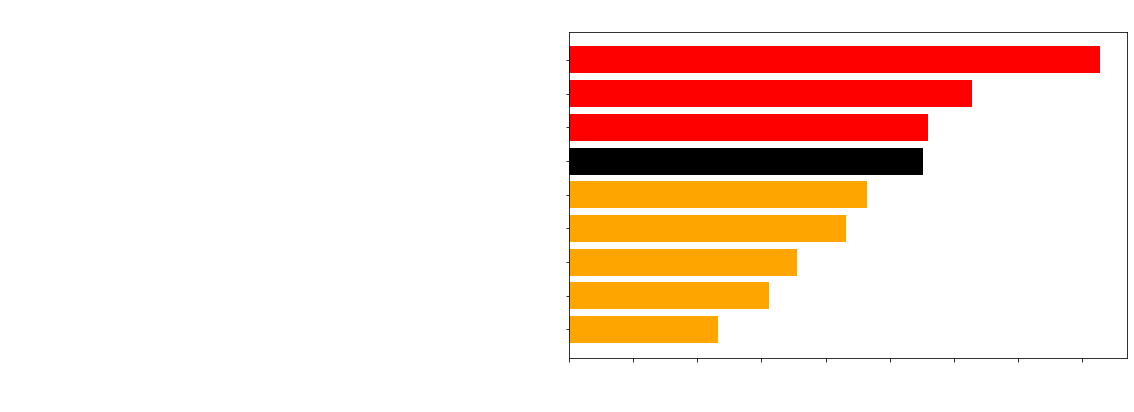

In [223]:
plt.figure(figsize=(10, 6))
plt.barh(width = food_loss_reg_sorted['Value'], y = food_loss_reg_sorted['GeoAreaName'], color=['orange', 'orange', 'orange', 'orange', 'orange', 'black', 'red', 'red', 'red',])
plt.title('Food Loss Percentage', fontsize=24, color='white')
plt.xticks(color='white', fontsize=18)
plt.yticks(color='white', fontsize=18)
plt.xlabel('Percentage', color='white', fontsize=18)
plt.ylabel('Region', color='white', fontsize=18)
plt.savefig('Food Loss Percentage.png', dpi=72,bbox_inches='tight', transparent=False);

## Forest Area

In [240]:
forest_data = pd.read_excel(r'15_1_1_May_2020.xlsx')

In [241]:
forest_area = forest_data[(forest_data['Indicator'] == '15.1.1')]

In [258]:
forest_area.head(25)

,GeoAreaName,RefAreaType_InternalUseOnly,TimePeriod,Value
0,World,1.0-Global,2000,31.932194
1,World,1.0-Global,2010,31.534908
2,World,1.0-Global,2015,31.362505
3,World,1.0-Global,2016,31.337440
4,World,1.0-Global,2017,31.284862
5,World,1.0-Global,2018,31.247740
6,World,1.0-Global,2019,31.208726
7,World,1.0-Global,2020,31.171001
8,Africa,2.4-Regional (M49),2000,23.843602
9,Africa,2.4-Regional (M49),2010,22.700750


In [251]:
forest_area.RefAreaType_InternalUseOnly.unique()

array(['1.0-Global', '2.4-Regional (M49)', '3.0-Country',
       '2.1-Regional (SDG)', '2.5-Regional (MDG)', '2.3-Other groupings'],
      dtype=object)

In [247]:
forest_area = forest_area.drop(columns=['Indicator', 'SeriesID', 'SeriesDescription', 'GeoAreaCode', 'Time_Detail',
                                        'Source', 'FootNote', 'Nature', 'Units', 'Reporting Type', 'SeriesCode',])

In [266]:
forest_area

,GeoAreaName,RefAreaType_InternalUseOnly,TimePeriod,Value
0,World,1.0-Global,2000,31.932194
1,World,1.0-Global,2010,31.534908
2,World,1.0-Global,2015,31.362505
3,World,1.0-Global,2016,31.337440
4,World,1.0-Global,2017,31.284862
...,...,...,...,...
563,Western Europe,2.4-Regional (M49),2016,31.915628
564,Western Europe,2.4-Regional (M49),2017,31.999839
565,Western Europe,2.4-Regional (M49),2018,32.084040
566,Western Europe,2.4-Regional (M49),2019,32.168251


In [264]:
forest_area = forest_area[forest_area.RefAreaType_InternalUseOnly != '3.0-Country']
forest_area = forest_area[forest_area.RefAreaType_InternalUseOnly != '2.1-Regional (SDG)']
forest_area = forest_area[forest_area.RefAreaType_InternalUseOnly != '2.3-Other groupings']
forest_area = forest_area[forest_area.RefAreaType_InternalUseOnly !=  '2.5-Regional (MDG)']

In [265]:
forest_area.GeoAreaName.unique()   

array(['World', 'Africa', 'South America', 'Western Africa',
       'Central America', 'Eastern Africa', 'Middle Africa',
       'Southern Africa', 'Americas', 'Caribbean', 'Southern Europe',
       'Melanesia', 'Micronesia', 'Polynesia', 'Asia', 'Eastern Europe',
       'Northern Europe', 'Western Europe'], dtype=object)

In [274]:
forest_area

,GeoAreaName,RefAreaType_InternalUseOnly,TimePeriod,Value
0,World,1.0-Global,2000,31.932194
1,World,1.0-Global,2010,31.534908
2,World,1.0-Global,2015,31.362505
3,World,1.0-Global,2016,31.337440
4,World,1.0-Global,2017,31.284862
...,...,...,...,...
563,Western Europe,2.4-Regional (M49),2016,31.915628
564,Western Europe,2.4-Regional (M49),2017,31.999839
565,Western Europe,2.4-Regional (M49),2018,32.084040
566,Western Europe,2.4-Regional (M49),2019,32.168251


In [275]:
forest_area.to_excel("Forest Area.xlsx")

In [284]:
wforest_area = forest_area[(forest_area['RefAreaType_InternalUseOnly'] == '1.0-Global')]

In [285]:
wforest_area

,GeoAreaName,RefAreaType_InternalUseOnly,TimePeriod,Value
0,World,1.0-Global,2000,31.932194
1,World,1.0-Global,2010,31.534908
2,World,1.0-Global,2015,31.362505
3,World,1.0-Global,2016,31.337440
4,World,1.0-Global,2017,31.284862
5,World,1.0-Global,2018,31.247740
6,World,1.0-Global,2019,31.208726
7,World,1.0-Global,2020,31.171001


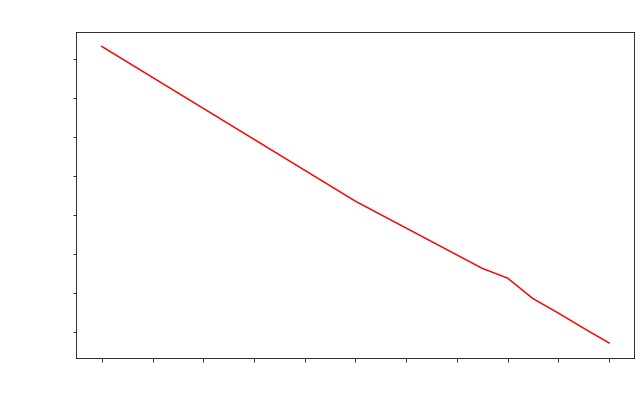

In [307]:
plt.figure(figsize=(10, 6))
plt.plot(wforest_area['TimePeriod'], wforest_area['Value'], color='red')
plt.title('World Forest Area', fontsize=24, color='white')
plt.xlabel('Year', fontsize=18, color='white')
plt.ylabel('Percentage', fontsize=18, color='white')
plt.xticks([2000,2002,2004,2006, 2008, 2010,2012,2014,2016,2018,2020],fontsize=18, color='white')
plt.yticks(fontsize=18, color='white')
plt.savefig('Forest Loss Percentage.png', dpi=72,bbox_inches='tight', transparent=False)
plt.show();

## Water Stress

In [300]:
wateruse_ef = all_data[(all_data['Indicator'] == '6.4.2')]

In [302]:
us_wateruse_ef = wateruse_ef[(wateruse_ef['GeoAreaName'] == 'United States of America')]
world_wateruse_ef = wateruse_ef[(wateruse_ef['GeoAreaName'] == 'World')]

In [303]:
us_wateruse_ef

,Indicator,SeriesID,SeriesDescription,GeoAreaCode,GeoAreaName,TimePeriod,Value,Time_Detail,Source,FootNote,...,SeriesCode,UpperBound,LowerBound,Age,CL_SEX,CL_OBS_STATUS,RefAreaType_InternalUseOnly,Disaggregation,OBS_STATUS,CumulativeValue
65725,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2000,30.0063,1998-2002,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN
65726,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2001,30.071,1998-2002,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65727,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2002,30.1356,1998-2002,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65728,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2003,30.2003,1998-2002,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65729,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2004,30.2649,2003-2007,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65730,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2005,30.3295,2003-2007,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN
65731,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2006,29.5703,2003-2007,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65732,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2007,28.8112,2003-2007,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65733,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2008,28.052,2003-2007,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN
65734,6.4.2,NaN,Level of water stress: freshwater withdrawal a...,840,United States of America,2009,27.2928,2008-2012,Food and Agriculture Organisation of United Na...,NaN,...,ER_H2O_STRESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,NaN


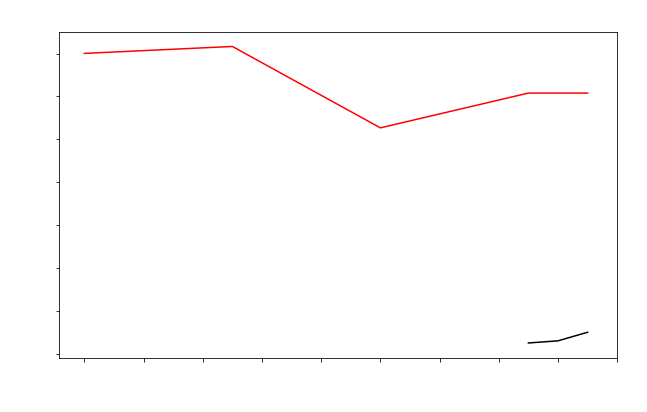

In [312]:
plt.figure(figsize=(10, 6))
plt.plot(us_wateruse_ef['TimePeriod'], us_wateruse_ef['Value'], color='red')
plt.plot(world_wateruse_ef['TimePeriod'], world_wateruse_ef['Value'], color='black')
plt.title('Water Stress', fontsize=24, color='white')
plt.xlabel('Year', fontsize=18, color='white')
plt.ylabel('Percentage', fontsize=18, color='white')
plt.xticks([2000,2002,2004,2006, 2008, 2010,2012,2014,2016,2018],fontsize=18, color='white')
plt.yticks(fontsize=18, color='white')
#plt.legend(fontsize=18)
plt.savefig('Water Stress.png', dpi=72,bbox_inches='tight', transparent=False)
plt.show();